## Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

### Import the necessary libraries and load the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style = 'darkgrid')

In [2]:
bank = pd.read_csv('bank_marketing_part1_Data-1.csv')

In [3]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


### Data Dictionary for Market Segmentation:

1- spending: Amount spent by the customer per month (in 1000s)
<br>2- advance_payments: Amount paid by the customer in advance by cash (in 100s)
<br>3- probability_of_full_payment: Probability of payment done in full by the customer to the bank
<br>4- current_balance: Balance amount left in the account to make purchases (in 1000s)
<br>5- credit_limit: Limit of the amount in credit card (10000s)
<br>6- min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
<br>7- max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

#### Checking the shape

In [4]:
bank.shape

(210, 7)

#### Checking the info

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

Observation: Dataset has 210 rows and 7 columns. All the columns are float and do not have null values.

In [7]:
bank.duplicated().any()

False

#### Descriptive analysis

In [8]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


#### Univariate Analysis

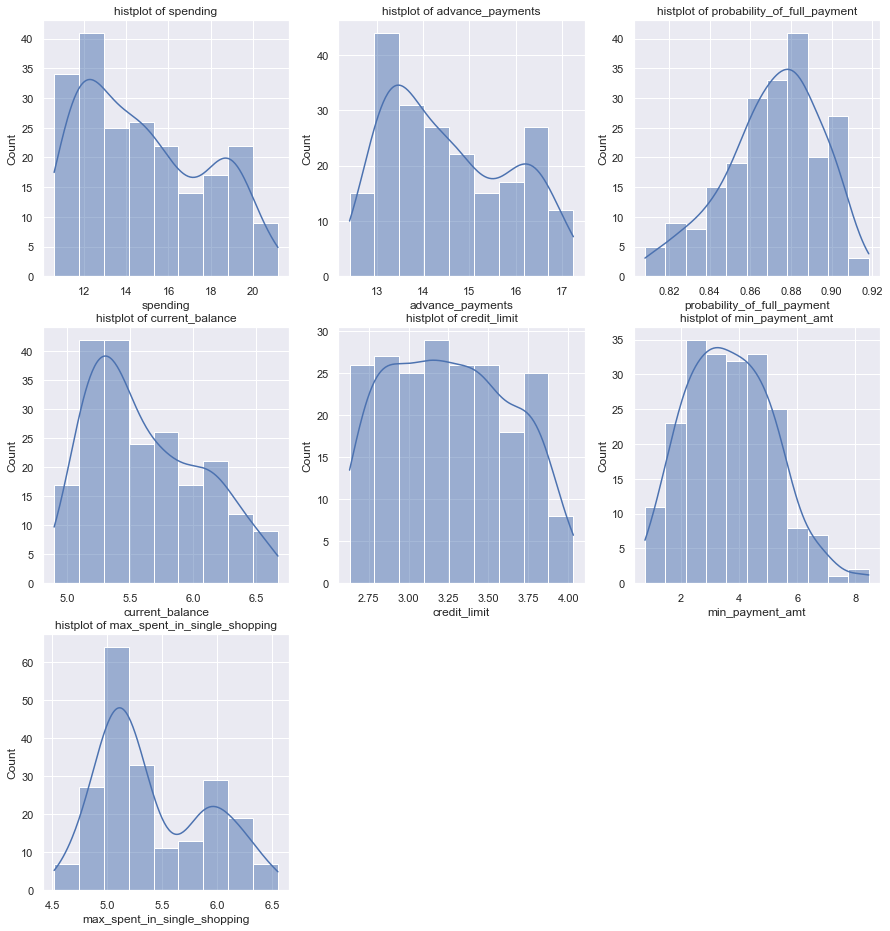

In [9]:
num_list = bank.columns
plt.figure(figsize=(15,16))
for i in range (len(num_list)):
    plt.subplot(3,3,i+1)
    sns.histplot(bank[num_list[i]],kde=True);
    plt.title(f'histplot of {num_list[i]}')
    plt.tight_layout

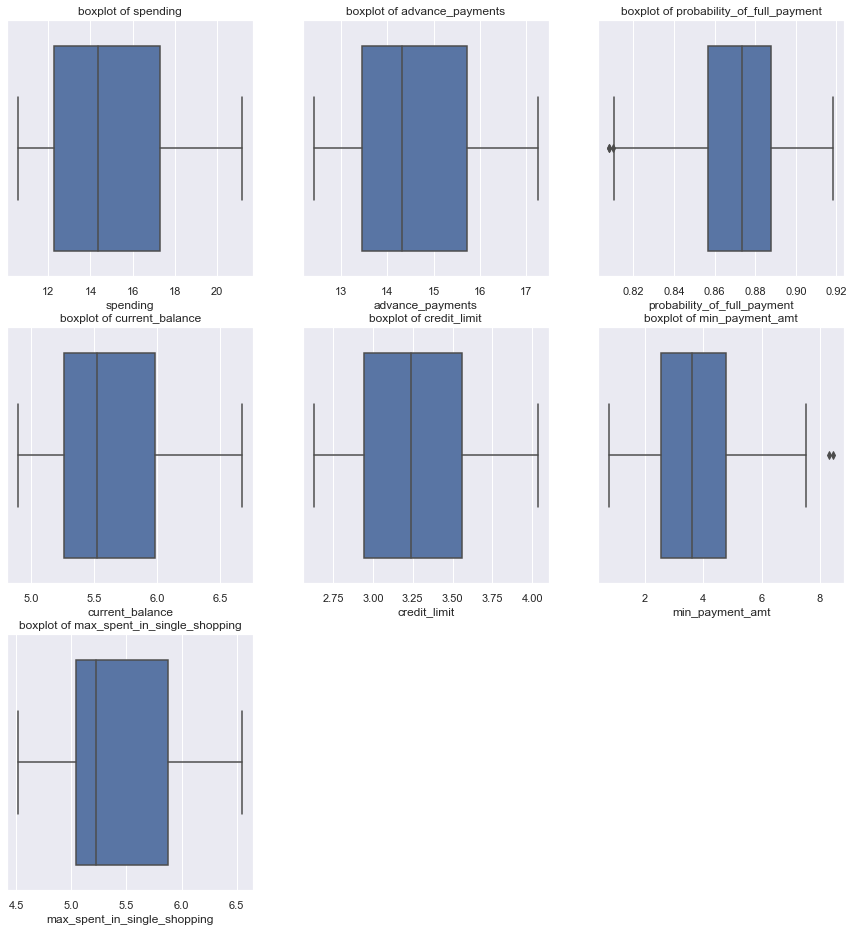

In [10]:
plt.figure(figsize=(15,16))
for i in range (len(num_list)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=bank,x=bank[num_list[i]]);
    plt.title(f'boxplot of {num_list[i]}')
    plt.tight_layout

Observation: From the histogram and boxplot, few variables look more normally distributted then the others for example - credit_limit. Skewness is there which we can calculate for all features.
<br>Outliers are present in the probability_of_full_payment and min_payment_amount

In [11]:
bank.skew(axis=0)

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

Observation: Only probability_of_full_payment is negative or left skewed. Rest of the variables are positive or right skewed

#### bivariate analysis

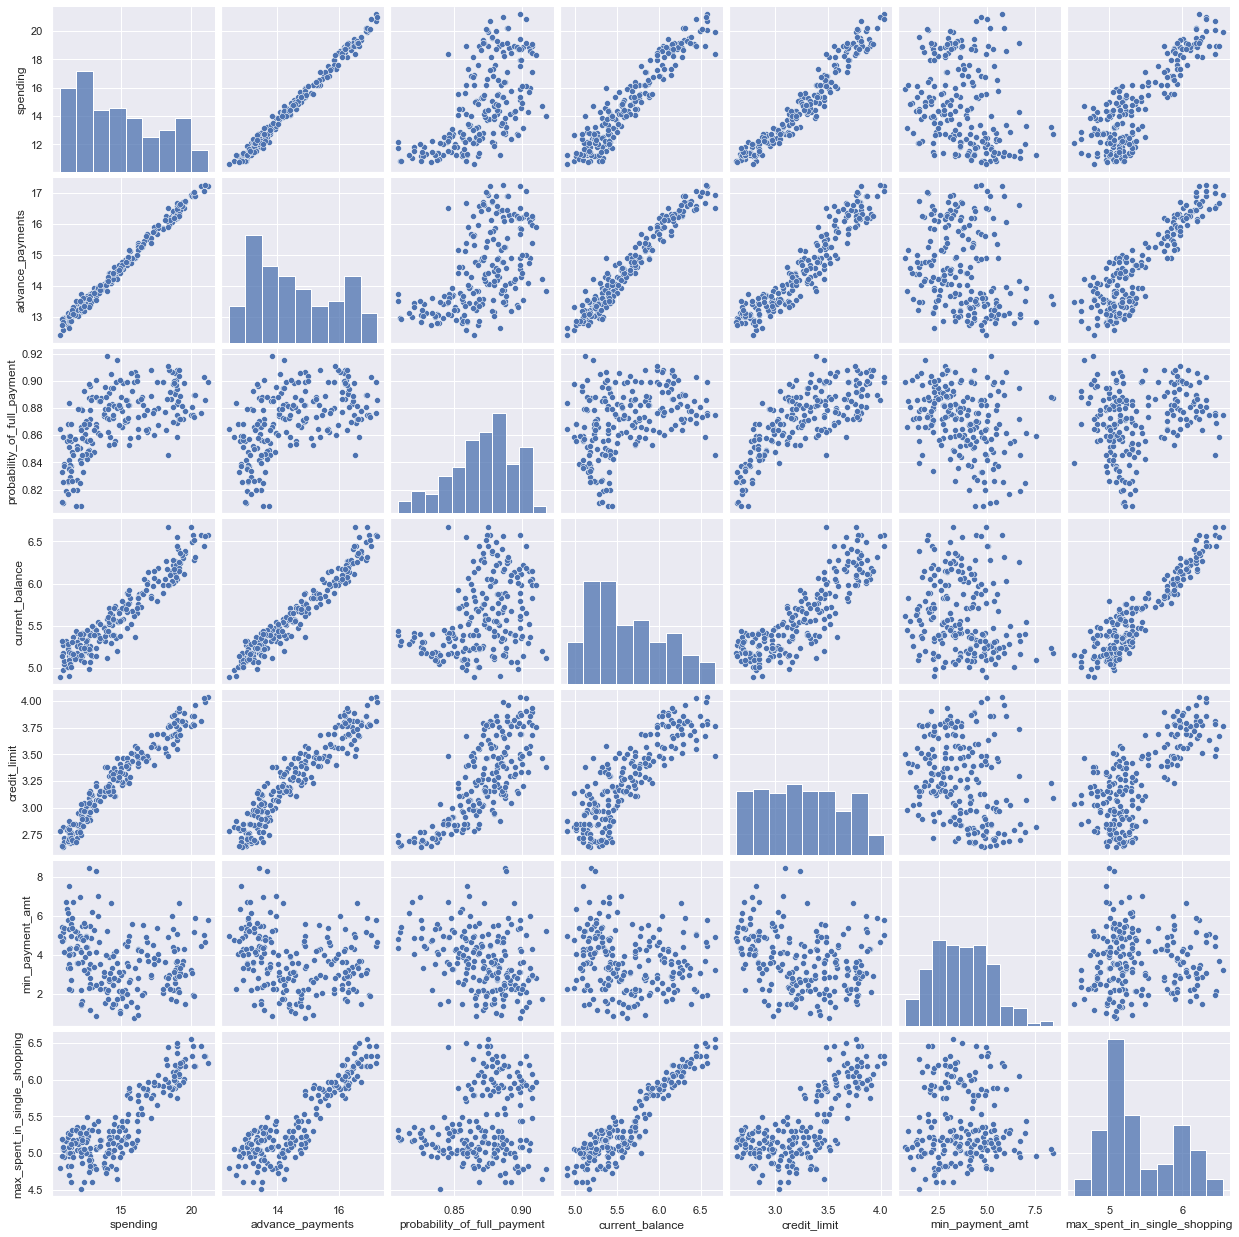

In [12]:
sns.pairplot(bank);

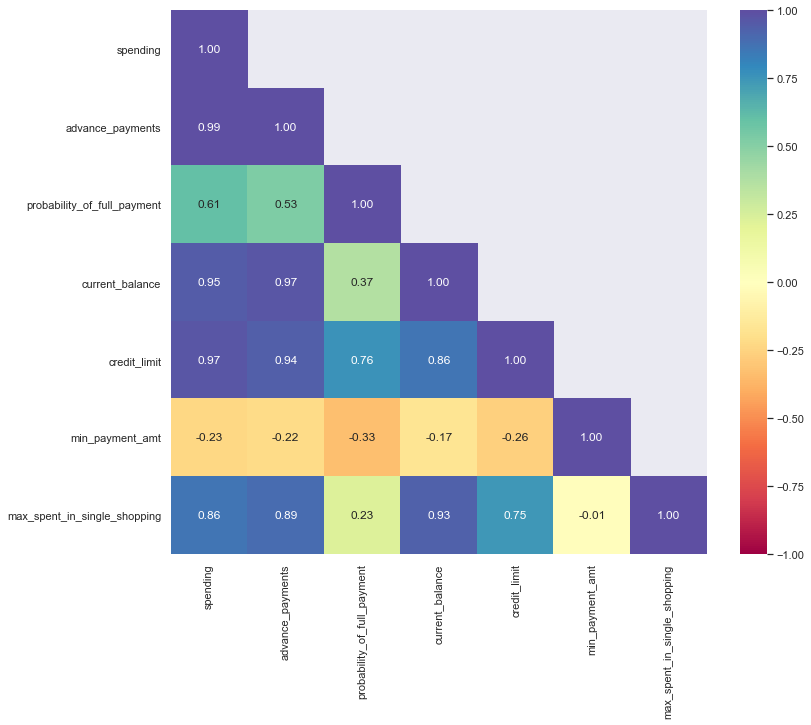

In [13]:
plt.figure(figsize=(12,10))

matrix = np.triu(bank.corr(),k=1)
sns.heatmap(bank.corr(),vmin=-1,vmax=1,annot=True,fmt='0.2f',center=0,mask=matrix,cmap= 'Spectral');

Observation: It is evident from the pairplot and heatmap that there is very strong correlation between few variables which are as follows.
<br>advance_payments and spending
<br>current_balance and spending
<br>current_balance and advance_payments
<br>credit_limit and spending
<br>credit_limit and advance payments
<br>credit_limit and probability_of_full_payment
<br>credit_limit and current_balance
<br>max_spend_in_single_shopping and spending
<br>max_spend_in_single_shopping and advance_payments
<br>max_spend_in_single_shopping and current_balance
<br>max_spend_in_single_shopping and credit_limit

#### Outlier treatment

In [14]:
def treat_outlier(x):
    # taking 25,75 percentile of column
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    x = np.where(x>upper_bound,upper_bound,x)
    x = np.where(x < lower_bound,lower_bound,x)
    return x

In [15]:
outlier_list = ['probability_of_full_payment','min_payment_amt']

In [16]:
for i in bank[outlier_list]:    
    bank[i]=treat_outlier(bank[i])

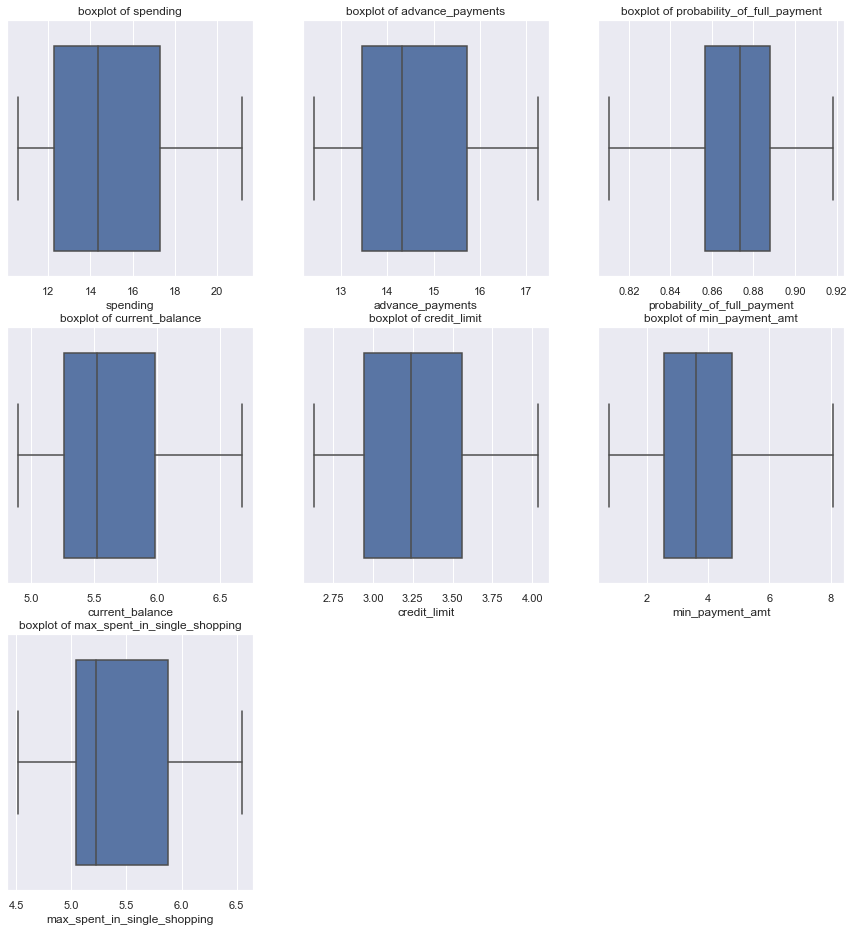

In [17]:
plt.figure(figsize=(15,16))
for i in range (len(num_list)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=bank,x=bank[num_list[i]]);
    plt.title(f'boxplot of {num_list[i]}')
    plt.tight_layout

## 1.2  Do you think scaling is necessary for clustering in this case? Justify

Scaling is very important for clustering. The reason is very simple. CLustering techniques use different ways to calculate the distance between two data points. If the features used in the data points are not on same scale then then feature with higher in numbers will become significant and the other one having lower number will become less significant. We can discuss it with an example.

Lets say we have two people. Person 1 is age 25 and salary 80,000 INR and second person is age 30 and salary 100,000 INR. If we calulate the difference using Euclidian method then 
Euclidean Distance = [(100000–80000)^2 + (30–25)^2]^(1/2)

which will come out to be around 20000.000625. It can be noted here that the high magnitude of income affected the distance between the two points. This will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude (income in this case). We do not want our algorithm to be affected by the magnitude of these variables. The algorithm should not be biased towards variables with higher magnitude. To overcome this problem, we can bring down all the variables to the same scale.

The most common techniques for scaling is zscore and min-max. We will use zscore technique here. The formula is:

z = (x-μ)/σ, where x is the raw score, μ is the population mean, and σ is the population standard deviation

This technique will bring all the values from -3 to +3 with mean 0 and standart deviation 1.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
SC = StandardScaler()
scaled_bank = SC.fit_transform(bank)

In [20]:
scaled_bank

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

In [21]:
scaled_bank = pd.DataFrame(data=scaled_bank, columns=bank.columns, index=bank.index)
scaled_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

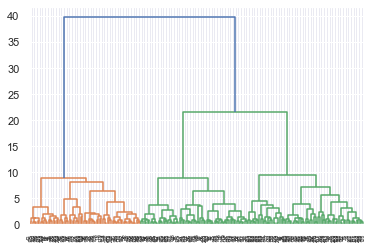

In [23]:
wardlink = linkage(scaled_bank, method = 'ward')
dend = dendrogram(wardlink)

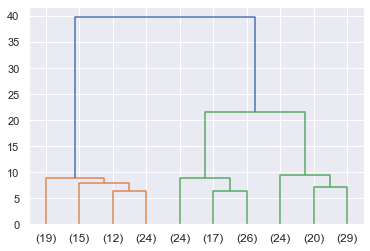

In [24]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [25]:
from scipy.cluster.hierarchy import fcluster

In [26]:
clusters = fcluster(wardlink, 24, criterion='distance')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [27]:
bank['clusters'] = clusters
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [28]:
bank.clusters.value_counts().sort_index()

1     70
2    140
Name: clusters, dtype: int64

In [29]:
aggdata=bank.groupby('clusters').mean()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
clusters,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371
2,13.085571,13.766214,0.864338,5.363714,3.045593,3.726353,5.103421


In [30]:
aggdata['Freq']=bank.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,13.085571,13.766214,0.864338,5.363714,3.045593,3.726353,5.103421,140


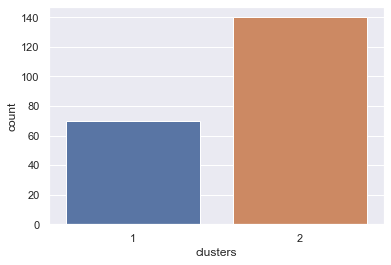

In [31]:
sns.countplot(x='clusters', data=bank);

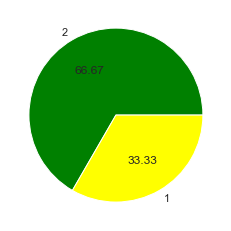

In [32]:
plt.pie(bank['clusters'].value_counts(),labels=['2','1'],autopct='%.2f',colors=['green','yellow'])
plt.show()

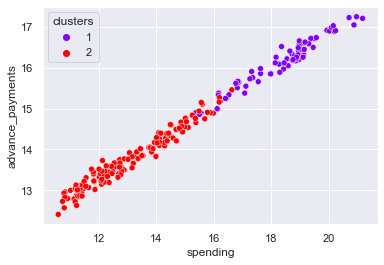

In [33]:
sns.scatterplot(x='spending',y='advance_payments',data=bank,hue='clusters',palette='rainbow');

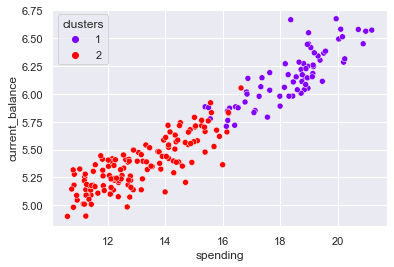

In [34]:
sns.scatterplot(x='spending',y='current_balance',data=bank,hue='clusters',palette='rainbow');

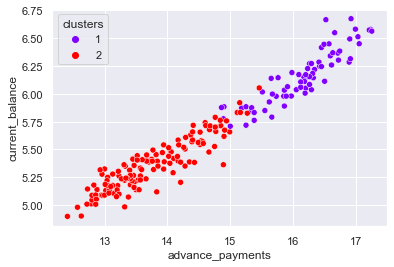

In [35]:
sns.scatterplot(x='advance_payments',y='current_balance',data=bank,hue='clusters',palette='rainbow');

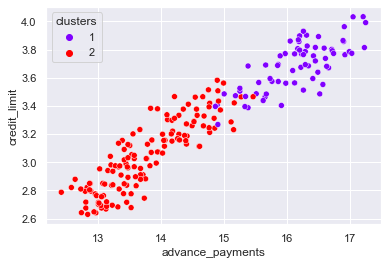

In [36]:
sns.scatterplot(x='advance_payments',y='credit_limit',data=bank,hue='clusters',palette='rainbow');

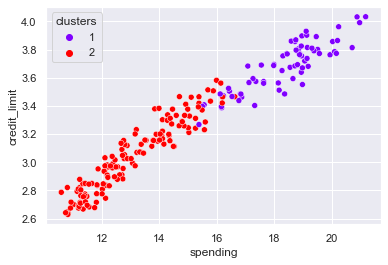

In [37]:
sns.scatterplot(x='spending',y='credit_limit',data=bank,hue='clusters',palette='rainbow');

## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [38]:
from sklearn.cluster import KMeans

In [39]:
#forming 2 clusters with k=2
k_means = KMeans(n_clusters=2,random_state=1)

In [40]:
k_means.fit(scaled_bank)

KMeans(n_clusters=2, random_state=1)

In [41]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [42]:
#within sum of squares
k_means.inertia_

659.14740095485

Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [43]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_bank)
k_means.inertia_

1469.999999999999

In [44]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_bank)
k_means.inertia_

430.298481751223

In [45]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_bank)
k_means.inertia_

371.0356644664012

In [46]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_bank)
k_means.inertia_

325.9741284729876

In [47]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_bank)
k_means.inertia_

289.45524862464833

wss is reducing as we increase K

#### Calculating WSS for other values of K - Elbow Method

In [48]:
wss=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_bank)
    wss.append(KM.inertia_)

In [49]:
wss

[1469.999999999999,
 659.14740095485,
 430.298481751223,
 371.0356644664012,
 325.9741284729876,
 289.45524862464833,
 263.859944426353,
 239.94446635017925,
 220.59353946108112,
 205.7633419678701]

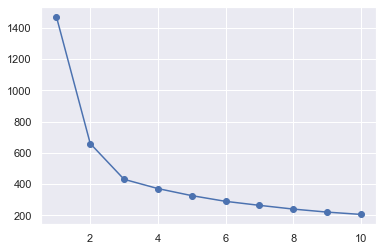

In [50]:
plt.plot(range(1,11), wss, marker = 'o');

#### Kmeans with K=3

In [51]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_bank)
labels = k_means.labels_

#### Cluster evaluation for 3 clusters: the silhouette score

In [52]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [53]:
silhouette_score(scaled_bank,labels)

0.4008059221522216

#### Kmeans with K=4

In [54]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_bank)
labels = k_means.labels_

In [55]:
silhouette_score(scaled_bank,labels)

0.3373662527862716

#### Kmeans with K=2

In [56]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_bank)
labels = k_means.labels_

In [57]:
silhouette_score(scaled_bank,labels)

0.46560100442748986

#### Check for multiple K-values in loop

In [58]:
ss = []
for k in range(2,11):
    sil_km = KMeans(n_clusters=k, random_state=1)
    sil_km.fit(scaled_bank)
    labels = sil_km.labels_
    ss.append(silhouette_score(scaled_bank,labels))

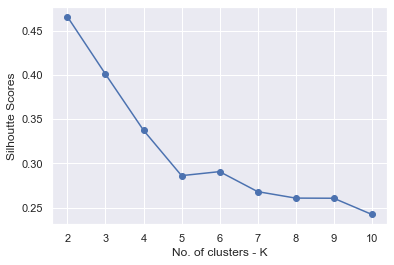

In [59]:
plt.plot(range(2,11),ss,marker ='o')
plt.xlabel('No. of clusters - K')
plt.ylabel('Silhoutte Scores');

silhouette score is better for 2 clusters than for other cluster numbers. So, final number of clusters we will take as 2.

In [60]:
k_means = KMeans(n_clusters=2, random_state=1)
k_means.fit(scaled_bank)
labels = k_means.labels_

In [61]:
# Appending Clusters labels to the original dataset
bank["Clus_kmeans2"] = labels
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans2
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,1


In [62]:
bank1 = bank.drop('clusters',axis=1)
bank1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans2
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


#### Visualization

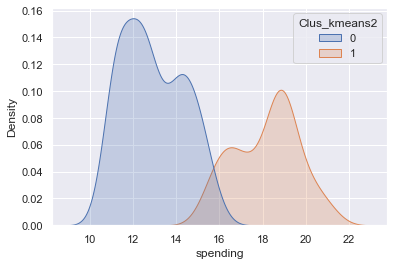

In [63]:
sns.kdeplot(data=bank1,x='spending',hue='Clus_kmeans2',shade=True);

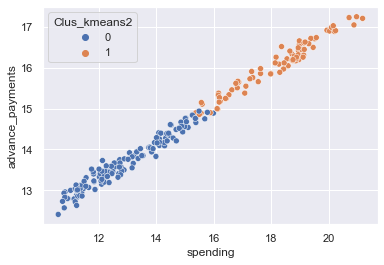

In [64]:
sns.scatterplot(x='spending',y='advance_payments',data=bank1,hue='Clus_kmeans2');

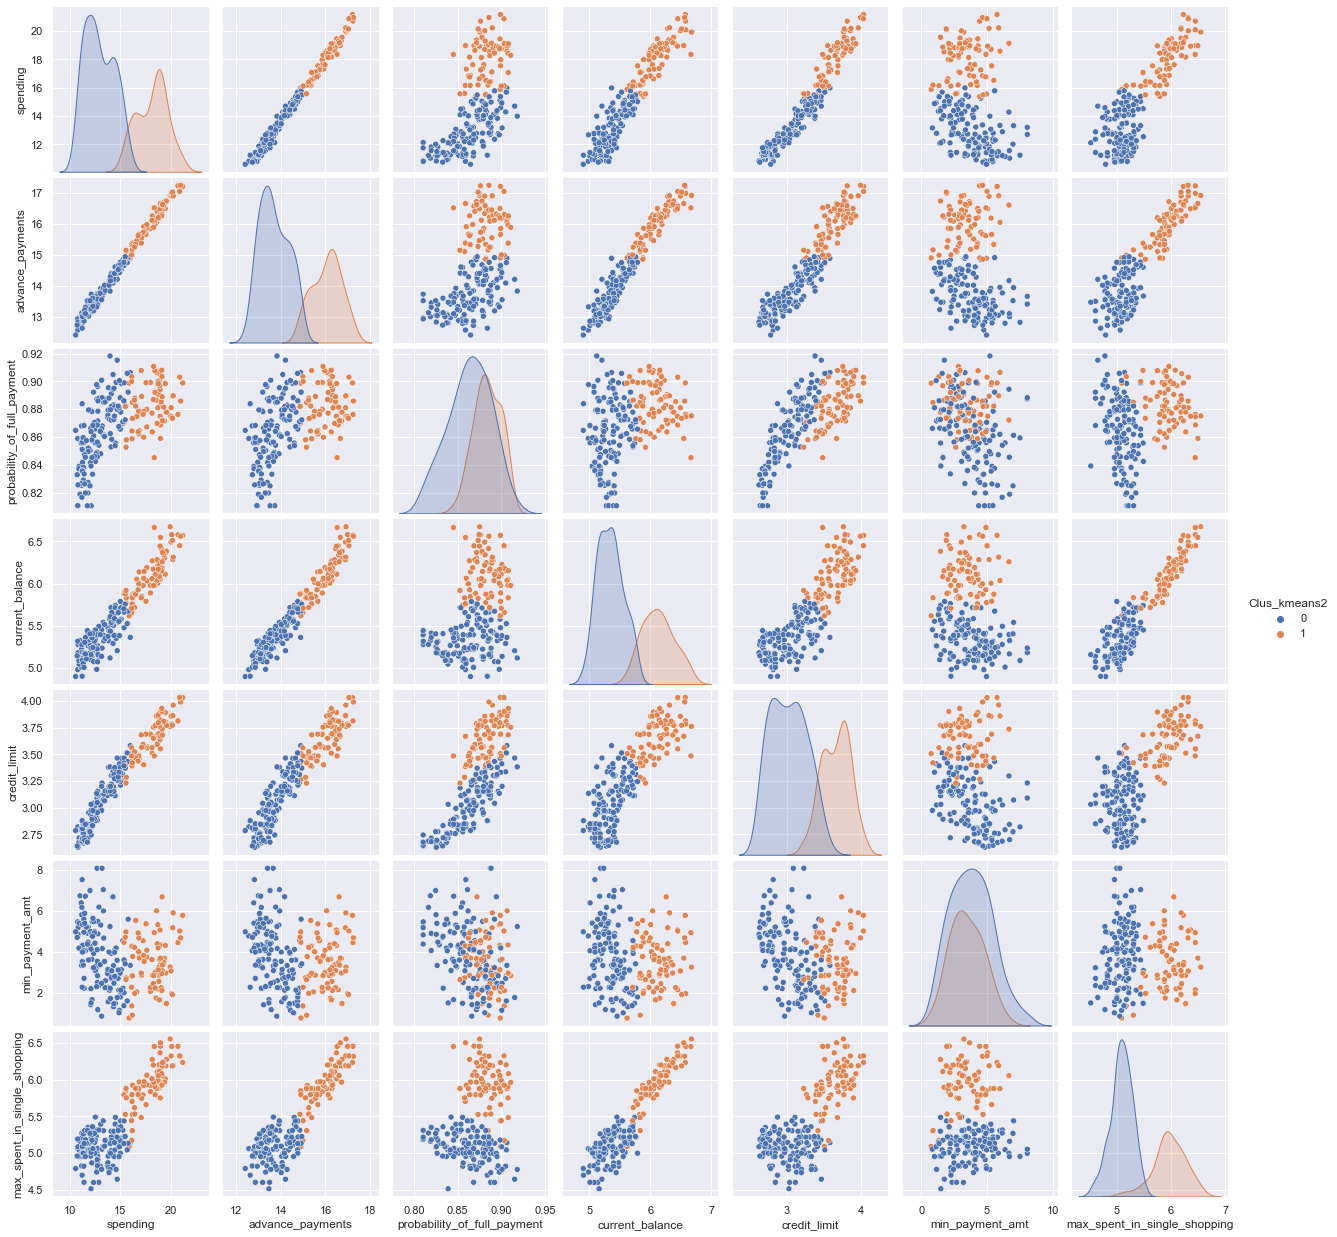

In [65]:
sns.pairplot(data=bank1,hue='Clus_kmeans2',diag_kind='kde');

### Cluster profiling

In [66]:
clust_profile=bank1.groupby('Clus_kmeans2').mean()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
Clus_kmeans2,,,,,,,
0,12.930602,13.693459,0.863619,5.339699,3.025917,3.822845,5.081737
1,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740


In [67]:
clust_profile['freq']=bank.Clus_kmeans2.value_counts().sort_index()
clust_profile.round(0)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans2,,,,,,,,
0,13.0,14.0,1.0,5.0,3.0,4.0,5.0,133
1,18.0,16.0,1.0,6.0,4.0,3.0,6.0,77


## Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration in days)
7. Destination of the tour (Destination)
8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
9. The commission received for tour insurance firm (Commission is in percentage of sales)
10.Age of insured (Age)

### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [68]:
insurance = pd.read_csv('insurance_part2_data-2.csv')

In [69]:
insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [70]:
insurance.shape

(3000, 10)

In [71]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [72]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [73]:
insurance.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [74]:
insurance.duplicated().sum()

139

In [75]:
insurance.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


inferences: 

1- There are 3000 rows and 10 columns in the data.
<br>2- 2 columns are integer, 2 are float, rest 6 are object datatype
<br>3- Duration has negative entry which needs to be treated
<br>4- There are 139 duplicate records but because there is no unique identifier so there is possibility that they are different customers so we would not drop them
<br>5- There is no missing value
<br>6- There are 9 independent variables and 1 target variable (Claimed)
<br>7- Commision & Sales- mean and median varies signficantly
<br>8- Agency_Code has 4, Type has 2, Claimed has 2, Channel has 2, Product Name has 5 and Destination has 3 unique values

#### Univariate Analysis of continuous variables

In [76]:
num_list1 = []
for col in insurance.columns:
    if (insurance[col].dtypes == 'int64' or insurance[col].dtype == 'float64'):
        num_list1.append(col)

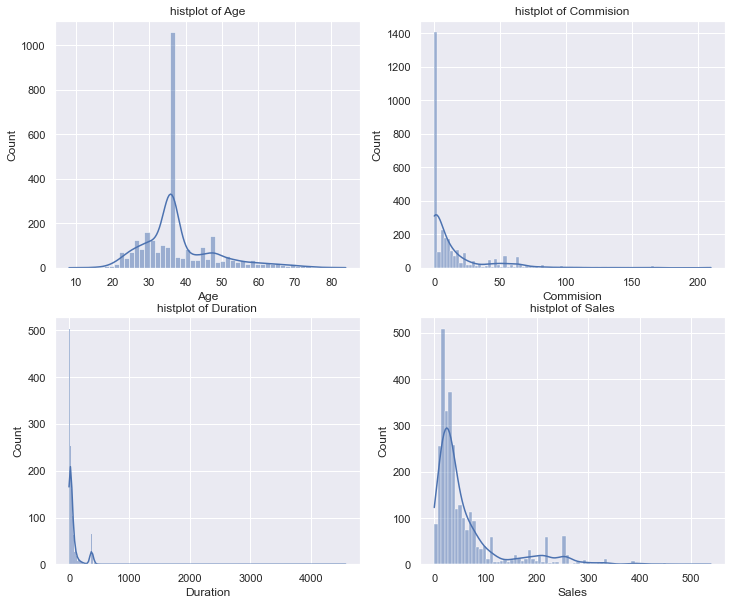

In [77]:
plt.figure(figsize=(12,10))
for i in range (len(num_list1)):
    plt.subplot(2,2,i+1)
    sns.histplot(insurance[num_list1[i]],kde=True);
    plt.title(f'histplot of {num_list1[i]}')
    plt.tight_layout

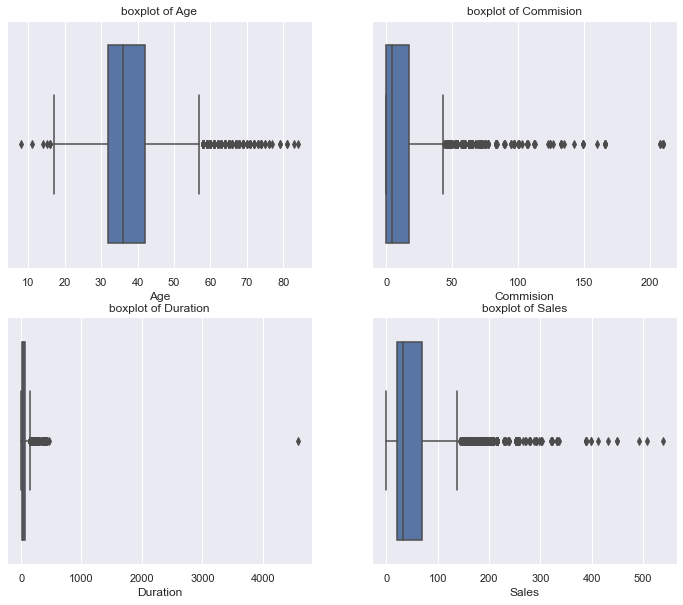

In [78]:
plt.figure(figsize=(12,10))
for i in range (len(num_list1)):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=insurance,x=insurance[num_list1[i]]);
    plt.title(f'boxplot of {num_list1[i]}')
    plt.tight_layout

inferences: There are outliers present in all continuous variables. Only Age has outliers less than the lower range of IQR. Rest of the continuour variables have outliers present for more than the upper range of IQR. Both Decision tree and Random Forest can handle the outliers so for now there is no need to treat the outliers.

#### Univariate Analysis of categorical variables

In [79]:
cat_list = []
for col in insurance.columns:
    if insurance[col].dtypes == 'object':
        cat_list.append(col)

In [80]:
for i in cat_list:
    print(f'The value counts for {i} is:')
    print(insurance[i].value_counts())
    print('-------------------------------------------------')

The value counts for Agency_Code is:
EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64
-------------------------------------------------
The value counts for Type is:
Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64
-------------------------------------------------
The value counts for Claimed is:
No     2076
Yes     924
Name: Claimed, dtype: int64
-------------------------------------------------
The value counts for Channel is:
Online     2954
Offline      46
Name: Channel, dtype: int64
-------------------------------------------------
The value counts for Product Name is:
Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64
-------------------------------------------------
The value counts for Destination is:
ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64
-----------------------------------

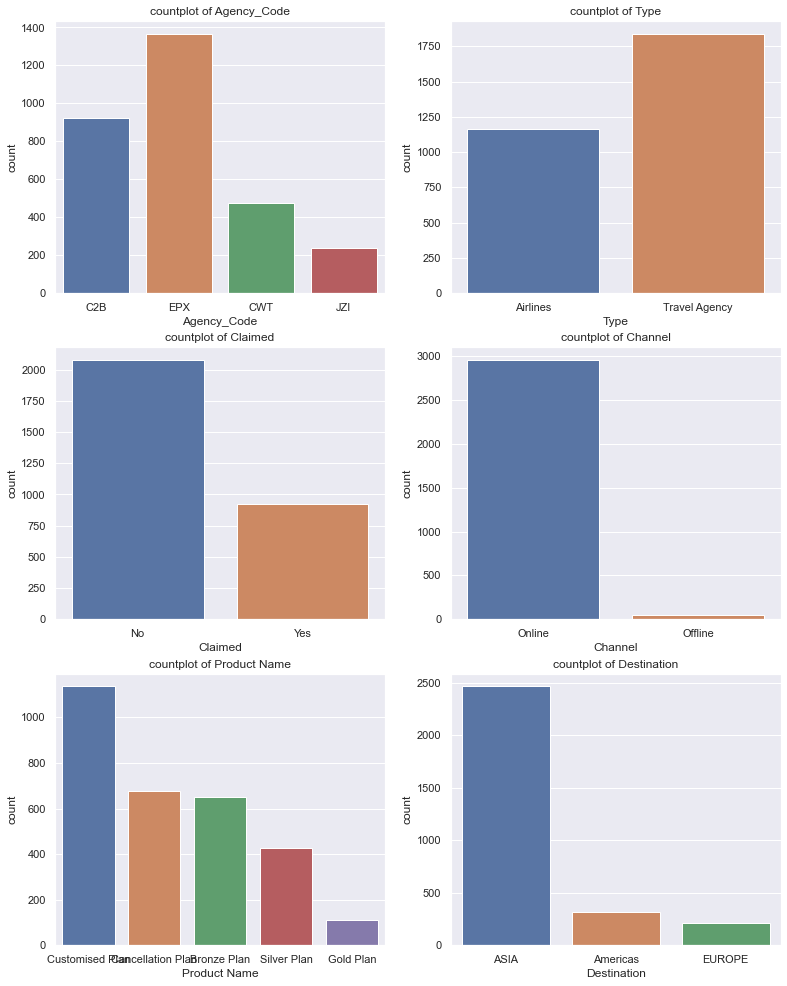

In [81]:
plt.figure(figsize=(13,17))
for i in range (len(cat_list)):
    plt.subplot(3,2,i+1)
    sns.countplot(insurance[cat_list[i]]);
    plt.title(f'countplot of {cat_list[i]}')
    plt.tight_layout

In [82]:
for i in cat_list:
    print(f'five point summary for {i} is:')
    print(insurance.groupby(i).describe().T)
    print('_____________________________________________________')

five point summary for Agency_Code is:
Agency_Code              C2B         CWT          EPX         JZI
Age       count   924.000000  472.000000  1365.000000  239.000000
          mean     37.765152   40.141949    36.832967   42.485356
          std      12.440020   12.340145     7.266296   11.758726
          min      11.000000    8.000000    19.000000   18.000000
          25%      28.000000   31.000000    36.000000   35.000000
          50%      34.500000   37.000000    36.000000   43.000000
          75%      47.000000   48.000000    36.000000   50.000000
          max      83.000000   84.000000    79.000000   75.000000
Commision count   924.000000  472.000000  1365.000000  239.000000
          mean     24.006169   39.144619     0.108425   11.638703
          std      24.994934   38.406734     1.797268    8.355118
          min       0.050000    0.000000     0.000000    6.300000
          25%       6.000000   17.820000     0.000000    7.700000
          50%      12.190000   24.070

#### Bivariate analysis of continuous variables

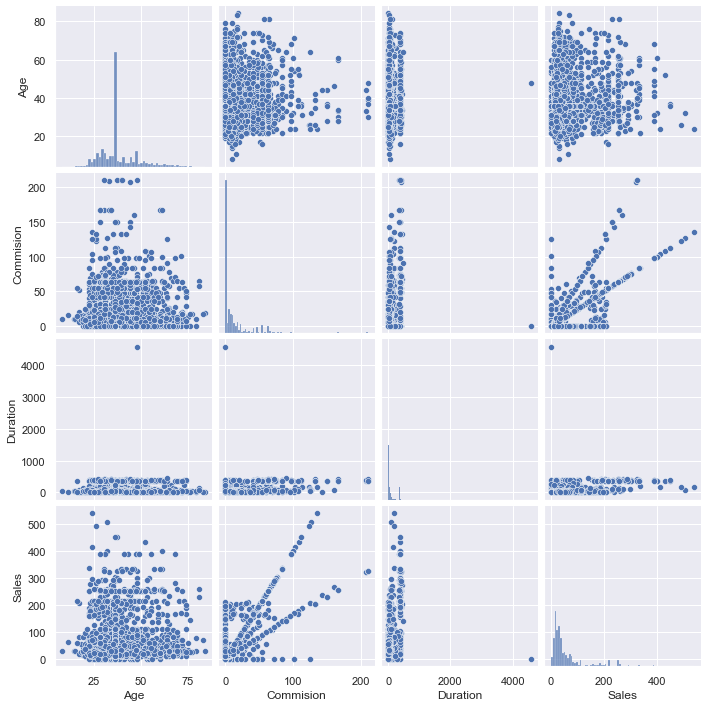

In [83]:
sns.pairplot(insurance);

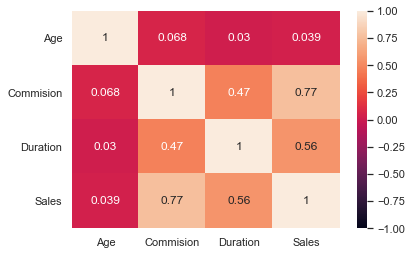

In [84]:
sns.heatmap(insurance.corr(),vmin=-1,vmax=1,annot=True);

inferences: Apart from Commision vs Sales, there are no variables in the data who have strong correlation

#### Multivariate analysis

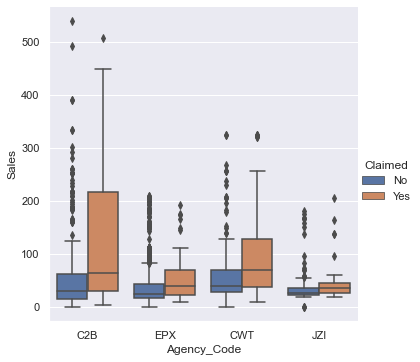

In [85]:
sns.catplot(data=insurance,x='Agency_Code',y='Sales',hue='Claimed',kind='box');

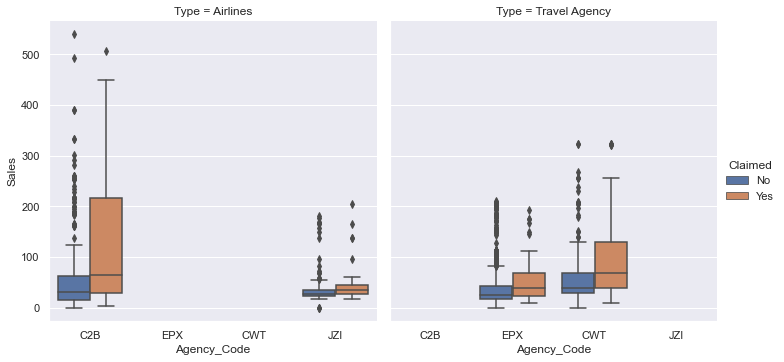

In [86]:
sns.catplot(data=insurance,x='Agency_Code',y='Sales',hue='Claimed',kind='box',col='Type');

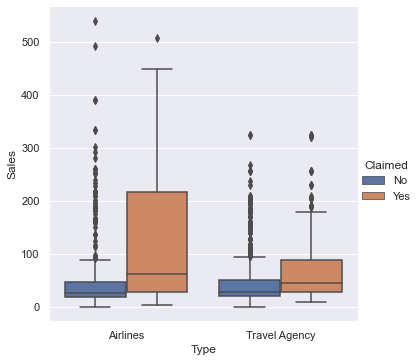

In [87]:
sns.catplot(data=insurance,x='Type',y='Sales',hue='Claimed',kind='box');

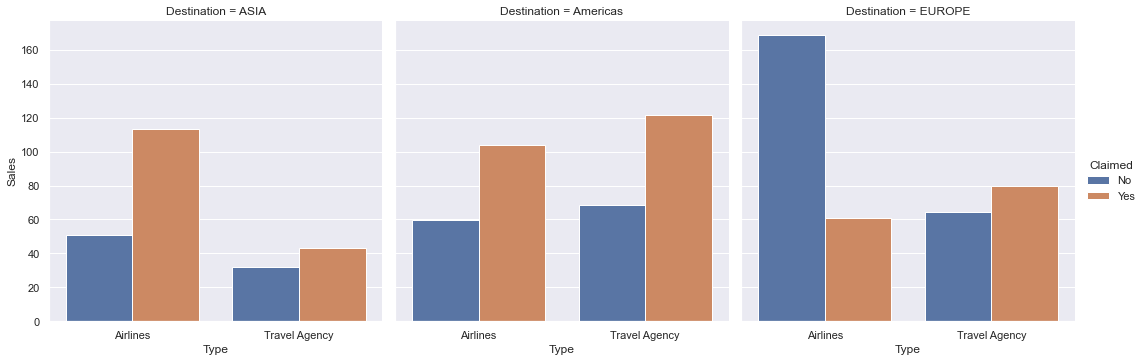

In [88]:
sns.catplot(data=insurance,x='Type',y='Sales',hue='Claimed',kind='bar',col='Destination',ci=None);

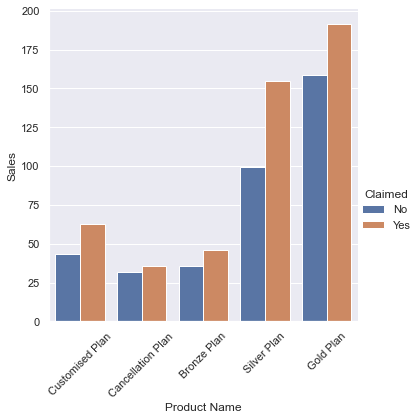

In [89]:
sns.catplot(data = insurance, x='Product Name',y='Sales', hue='Claimed',kind='bar',ci=None);
plt.xticks(rotation=45);

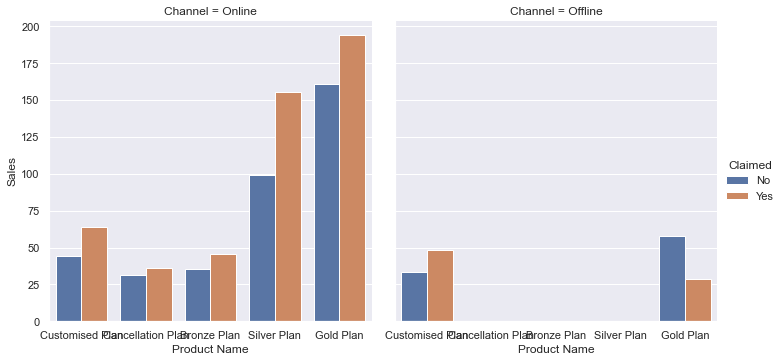

In [90]:
sns.catplot(data = insurance, x='Product Name',y='Sales', hue='Claimed',kind='bar',ci=None,col='Channel');

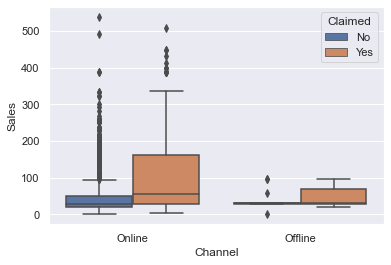

In [91]:
sns.boxplot(data = insurance, x='Channel',y='Sales', hue='Claimed');

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

Replacing the -ve value in Duration with median value of Duration

In [92]:
insurance[insurance['Duration'] < 0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


In [93]:
insurance.Duration.median()

26.5

In [94]:
insurance.Duration = insurance.Duration.replace(to_replace = -1, 
                                      value =insurance.Duration.median())

In [95]:
insurance.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.010500,60.249913
std,10.463518,25.481455,134.049397,70.733954
min,8.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.750000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


#### Data encoding

In [96]:
insurance['Claimed'] = pd.Categorical(insurance['Claimed']).codes

In [97]:
insurance['Type'] = pd.Categorical(insurance['Type']).codes

In [98]:
insurance['Channel'] = pd.Categorical(insurance['Channel']).codes

In [99]:
Ag_Cd = pd.get_dummies(insurance.Agency_Code,drop_first=True)
insurance = pd.concat((insurance,Ag_Cd), axis=1)
insurance = insurance.drop('Agency_Code', axis=1)

In [100]:
PN = pd.get_dummies(insurance['Product Name'],drop_first=True)
insurance = pd.concat((insurance,PN), axis=1)
insurance = insurance.drop('Product Name', axis=1)

In [101]:
Dstn = pd.get_dummies(insurance.Destination,drop_first=True)
insurance = pd.concat((insurance,Dstn), axis=1)
insurance = insurance.drop('Destination', axis=1)

In [102]:
insurance.head()

,Age,Type,Claimed,Commision,Channel,Duration,Sales,CWT,EPX,JZI,Cancellation Plan,Customised Plan,Gold Plan,Silver Plan,Americas,EUROPE
0,48,0,0,0.70,1,7.0,2.51,0,0,0,0,1,0,0,0,0
1,36,1,0,0.00,1,34.0,20.00,0,1,0,0,1,0,0,0,0
2,39,1,0,5.94,1,3.0,9.90,1,0,0,0,1,0,0,1,0
3,36,1,0,0.00,1,4.0,26.00,0,1,0,1,0,0,0,0,0
4,33,0,0,6.30,1,53.0,18.00,0,0,1,0,0,0,0,0,0


In [103]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                3000 non-null   int64  
 1   Type               3000 non-null   int8   
 2   Claimed            3000 non-null   int8   
 3   Commision          3000 non-null   float64
 4   Channel            3000 non-null   int8   
 5   Duration           3000 non-null   float64
 6   Sales              3000 non-null   float64
 7   CWT                3000 non-null   uint8  
 8   EPX                3000 non-null   uint8  
 9   JZI                3000 non-null   uint8  
 10  Cancellation Plan  3000 non-null   uint8  
 11  Customised Plan    3000 non-null   uint8  
 12  Gold Plan          3000 non-null   uint8  
 13  Silver Plan        3000 non-null   uint8  
 14  Americas           3000 non-null   uint8  
 15  EUROPE             3000 non-null   uint8  
dtypes: float64(3), int64(1),

#### Separate Target Feature & Independent Features

In [104]:
X = insurance.drop('Claimed',axis=1)
y = insurance.iloc[:,2]

#### Train- Test Split of Data

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

#### Checking the dimensions of the training and test data

In [107]:
X_train.shape, X_test.shape

((2100, 15), (900, 15))

In [108]:
y_train.shape, y_test.shape

((2100,), (900,))

### Building a Decision Tree Classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
dt_model = DecisionTreeClassifier(criterion = 'gini',random_state=1)

In [111]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

#### Visualizing the Tree Flow

In [112]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('c:\project_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, # tree model
                                out_file=ld_Tree_File, # file into which the tree flow to be written
                                feature_names = list(X_train), # names of features 
                                class_names = list(train_char_label)) # tgt feature labels

ld_Tree_File.close()

In [113]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [6,7,8,9,10,11],
    'min_samples_leaf': [20, 30, 40,50],
    'min_samples_split': [50, 60, 90, 120, 150]
}

dt_model = DecisionTreeClassifier(random_state=1)

grid_search_dt = GridSearchCV(estimator = dt_model, param_grid = param_grid_dt, cv = 5)

In [114]:
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': [20, 30, 40, 50],
                         'min_samples_split': [50, 60, 90, 120, 150]})

In [115]:
grid_search_dt.best_params_

{'max_depth': 7, 'min_samples_leaf': 30, 'min_samples_split': 120}

In [151]:
best_grid_dt.feature_importances_

array([0.01432689, 0.        , 0.19150948, 0.        , 0.02105516,
       0.14550948, 0.        , 0.        , 0.06956635, 0.03650382,
       0.09938783, 0.        , 0.40947878, 0.0126622 , 0.        ])

In [116]:
best_grid_dt = grid_search_dt.best_estimator_

In [153]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File1 = open('c:\project_tree1.dot','w')
dot_data = tree.export_graphviz(best_grid_dt, # tree model
                                out_file=ld_Tree_File1, # file into which the tree flow to be written
                                feature_names = list(X_train), # names of features 
                                class_names = list(train_char_label)) # tgt feature labels

ld_Tree_File1.close()

In [117]:
ytrain_predict_dt = best_grid_dt.predict(X_train)
ytest_predict_dt = best_grid_dt.predict(X_test)

In [183]:
y_test1 = np.array(y_test)

In [190]:
print(np.concatenate((ytest_predict_dt.reshape(len(ytest_predict_dt),1), y_test1.reshape(len(y_test1),1)),1))

[[1 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


### Building a Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid_rm = {
    'max_depth': [9, 10, 11],
    'max_features': [10, 11, 12],
    'min_samples_leaf': [10, 15, 20],
    'min_samples_split': [30, 45, 60],
    'n_estimators': [101, 201]
}

rfc = RandomForestClassifier(random_state=1)

grid_search_rm = GridSearchCV(estimator = rfc, param_grid = param_grid_rm, cv = 3)

In [120]:
grid_search_rm.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [9, 10, 11], 'max_features': [10, 11, 12],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [30, 45, 60],
                         'n_estimators': [101, 201]})

In [121]:
grid_search_rm.best_params_

{'max_depth': 10,
 'max_features': 11,
 'min_samples_leaf': 10,
 'min_samples_split': 45,
 'n_estimators': 101}

In [122]:
best_grid_rm = grid_search_rm.best_estimator_

In [152]:
best_grid_rm.feature_importances_

array([6.21950004e-02, 1.08120852e-01, 1.89037499e-01, 1.23019659e-04,
       9.58921765e-02, 2.05608475e-01, 5.41506664e-03, 3.16876597e-02,
       6.01312043e-02, 2.97702626e-02, 3.72140682e-02, 8.71030390e-03,
       1.54793214e-01, 8.80107092e-03, 2.50012679e-03])

In [123]:
ytrain_predict_rm = best_grid_rm.predict(X_train)
ytest_predict_rm = best_grid_rm.predict(X_test)

In [189]:
print(np.concatenate((ytest_predict_rm.reshape(len(ytest_predict_rm),1), y_test1.reshape(len(y_test1),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


### Building a MLP Classifier (Artificial Neural Network)

In [124]:
# To build the ANN, we need to scale the data first
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [125]:
from sklearn.neural_network import MLPClassifier

In [126]:
param_grid_ann = {
    'hidden_layer_sizes': [100, (100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

ann = MLPClassifier(random_state=1)

grid_search_ann = GridSearchCV(estimator = ann, param_grid = param_grid_ann, cv = 3)

In [127]:
grid_search_ann.fit(X_trains, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [100, (100, 100, 100)],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [128]:
grid_search_ann.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [129]:
best_grid_ann = grid_search_ann.best_estimator_

In [130]:
ytrain_predict_ann = best_grid_ann.predict(X_trains)
ytest_predict_ann = best_grid_ann.predict(X_tests)

In [191]:
print(np.concatenate((ytest_predict_ann.reshape(len(ytest_predict_ann),1), y_test1.reshape(len(y_test1),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [192]:
value_check = np.concatenate((ytest_predict_dt.reshape(len(ytest_predict_dt),1), ytest_predict_rm.reshape(len(ytest_predict_rm),1), ytest_predict_ann.reshape(len(ytest_predict_ann),1), y_test1.reshape(len(y_test1),1)),1)

In [194]:
pd.DataFrame(value_check,columns=['DecisionTree_Predicted_values','RandomForest_Predicted_values','ANN_Predicted_values','Original_Test_Values'])

,DecisionTree_Predicted_values,RandomForest_Predicted_values,ANN_Predicted_values,Original_Test_Values
0,1,0,0,0
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,0,0,0,0
...,...,...,...,...
895,0,0,0,0
896,0,0,0,0
897,1,1,1,1
898,0,0,0,0


## 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

In [131]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, roc_auc_score, f1_score

#### Performance metrics for DecisionTree

In [132]:
# Classification report for training set
print(classification_report(y_train,ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1471
           1       0.69      0.56      0.62       629

    accuracy                           0.79      2100
   macro avg       0.76      0.73      0.74      2100
weighted avg       0.79      0.79      0.79      2100



In [133]:
# Classification report for testing set
print(classification_report(y_test,ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       605
           1       0.71      0.50      0.59       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.72       900
weighted avg       0.76      0.77      0.76       900



In [197]:
#Accuracy score of training set
print(f'accuracy score of Decision Tree model training set is: {round(accuracy_score(y_train, ytrain_predict_dt),2)}')

accuracy score of Decision Tree model training set is: 0.79


In [198]:
#Accuracy score of test set
print(f'accuracy score of Decision Tree model test set is: {round(accuracy_score(y_test, ytest_predict_dt),2)}')

accuracy score of Decision Tree model test set is: 0.77


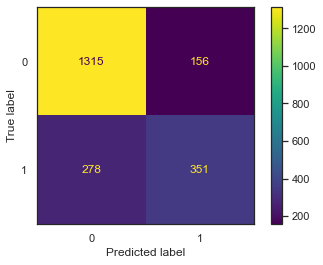

In [134]:
#Confusion matrix for training set
sns.set_style('white')
plot_confusion_matrix(estimator=best_grid_dt, X=X_train, y_true=y_train);

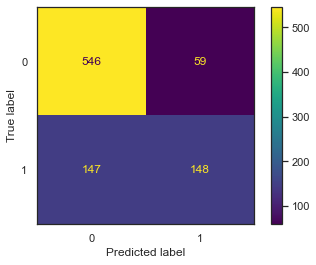

In [135]:
#Confusion matrix for test set
plot_confusion_matrix(estimator=best_grid_dt, X=X_test, y_true=y_test);

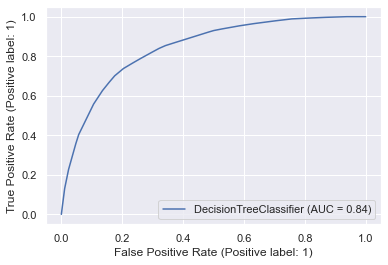

In [136]:
# roc curve for training set
sns.set(style = 'darkgrid')
plot_roc_curve(estimator=best_grid_dt,X=X_train,y=y_train);

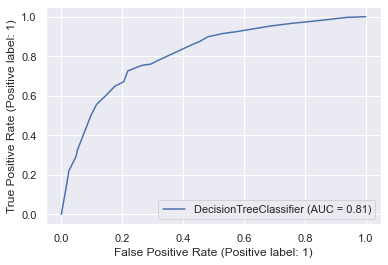

In [137]:
# roc curve for training set
plot_roc_curve(estimator=best_grid_dt,X=X_test,y=y_test);

#### Performance metrics for RandomForest

In [138]:
# Classification report for training set
print(classification_report(y_train,ytrain_predict_rm))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1471
           1       0.74      0.61      0.67       629

    accuracy                           0.82      2100
   macro avg       0.79      0.76      0.77      2100
weighted avg       0.81      0.82      0.81      2100



In [139]:
# Classification report for test set
print(classification_report(y_test,ytest_predict_rm))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       605
           1       0.73      0.49      0.59       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.72       900
weighted avg       0.77      0.77      0.76       900



In [199]:
#Accuracy score of training set
print(f'accuracy score of Random Forest model training set is: {round(accuracy_score(y_train, ytrain_predict_rm),2)}')

accuracy score of Random Forest model training set is: 0.82


In [200]:
#Accuracy score of training set
print(f'accuracy score of Random Forest model test set is: {round(accuracy_score(y_test, ytest_predict_rm),2)}')

accuracy score of Random Forest model test set is: 0.77


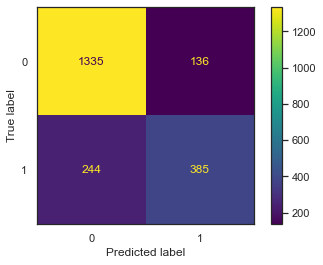

In [140]:
#Confusion matrix for training set
sns.set_style('white')
plot_confusion_matrix(estimator=best_grid_rm, X=X_train, y_true=y_train);

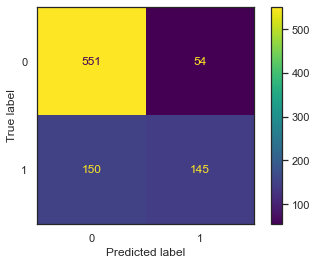

In [141]:
#Confusion matrix for test set
plot_confusion_matrix(estimator=best_grid_rm, X=X_test, y_true=y_test);

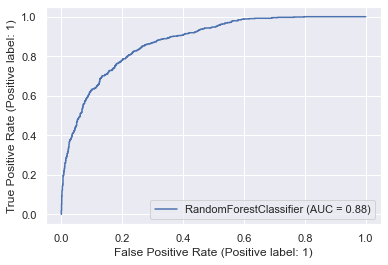

In [142]:
# roc curve for training set
sns.set(style = 'darkgrid')
plot_roc_curve(estimator=best_grid_rm,X=X_train,y=y_train);

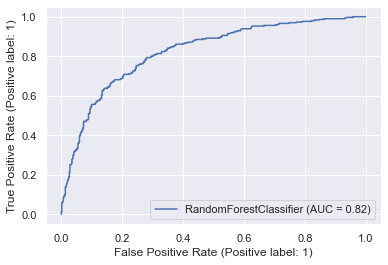

In [143]:
# roc curve for training set
plot_roc_curve(estimator=best_grid_rm,X=X_test,y=y_test);

### Performance metrics for ANN

In [144]:
# Classification report for training set
print(classification_report(y_train,ytrain_predict_ann))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1471
           1       0.64      0.67      0.66       629

    accuracy                           0.79      2100
   macro avg       0.75      0.76      0.75      2100
weighted avg       0.79      0.79      0.79      2100



In [145]:
# Classification report for test set
print(classification_report(y_test,ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       605
           1       0.68      0.59      0.63       295

    accuracy                           0.77       900
   macro avg       0.74      0.73      0.73       900
weighted avg       0.77      0.77      0.77       900



In [201]:
#Accuracy score of training set
print(f'accuracy score of MLP Classifier model training set is: {round(accuracy_score(y_train, ytrain_predict_ann),2)}')

accuracy score of MLP Classifier model training set is: 0.79


In [202]:
#Accuracy score of training set
print(f'accuracy score of MLP Classifier model test set is: {round(accuracy_score(y_test, ytest_predict_ann),2)}')

accuracy score of MLP Classifier model test set is: 0.77


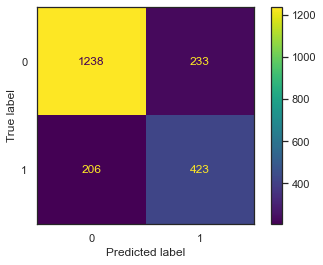

In [146]:
#Confusion matrix for training set
sns.set_style('white')
plot_confusion_matrix(estimator=best_grid_ann, X=X_trains, y_true=y_train);

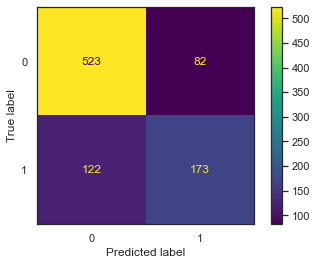

In [147]:
#Confusion matrix for test set
plot_confusion_matrix(estimator=best_grid_ann, X=X_tests, y_true=y_test);

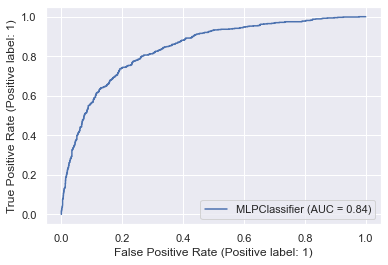

In [148]:
# roc curve for training set
sns.set(style = 'darkgrid')
plot_roc_curve(estimator=best_grid_ann,X=X_trains,y=y_train);

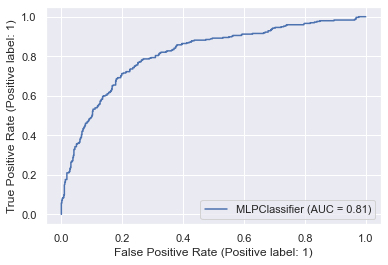

In [149]:
# roc curve for training set
plot_roc_curve(estimator=best_grid_ann,X=X_tests,y=y_test);

Creating table for performance metrics

In [150]:
index=['Accuracy', 'Recall','Precision','F1 Score', 'AUC']
data = pd.DataFrame({'CART Train':[0.79,0.56,0.69,0.62,0.84],
        'CART Test':[0.77,0.50,0.71,0.59,0.81],
       'Random Forest Train':[0.82,0.61,0.74,0.67,0.88],
        'Random Forest Test':[0.77,0.49,0.73,0.59,0.82],
       'Neural Network Train':[0.79,0.67,0.64,0.66,0.84],
        'Neural Network Test':[0.77,0.59,0.68,0.63,0.81]},
                    index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.77,0.82,0.77,0.79,0.77
Recall,0.56,0.50,0.61,0.49,0.67,0.59
Precision,0.69,0.71,0.74,0.73,0.64,0.68
F1 Score,0.62,0.59,0.67,0.59,0.66,0.63
AUC,0.84,0.81,0.88,0.82,0.84,0.81
